# 01_EXPLORE - Galaxy morphology dataset
**Date:** 07-09-2025

**Goals:** Inspect galaxy zoo 2 dataset, show label distribution, sample images and captions, quality check, and verify for leakage before training.

In [53]:
# imports
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

sns.set(style='whitegrid')

random.seed(5629)
np.random.seed(5629)

labels_filepath = r"C:\Users\user\PycharmProjects\galaxy_morphology_ml_captioning\data\labels\labels_manifest_1000.csv"
thumbnails_directory = r"C:\Users\user\PycharmProjects\galaxy_morphology_ml_captioning\data\labels\thumbs"

manifest_labels_fp = r"C:\Users\user\PycharmProjects\galaxy_morphology_ml_captioning\data\processed\manifest_with_labels.csv"


This section presents the inspection of the dataset for issues, as well as exploration of its structure and contents of it.

Let's start by getting familiar with the data. Here is a list of all the columns:

In [54]:
df = pd.read_csv(labels_filepath)
dfm = pd.read_csv(manifest_labels_fp)
print("Rows in full dataset: \n", dfm.shape[0])
print("Columns in full dataset: \n", dfm.columns.tolist())
print("Rows in sample: \n", df.shape[0])
print("Columns in sample: \n", df.columns.tolist())
print("Manifest head:\n")
dfm.head()

Rows in full dataset: 
 239695
Columns in full dataset: 
 ['objid', 'sample', 'asset_id', 'dr7objid', 'gz2_class', 'total_classifications', 'total_votes', 't01_smooth_or_features_a01_smooth_fraction', 't01_smooth_or_features_a01_smooth_weighted_fraction', 't01_smooth_or_features_a01_smooth_debiased', 't01_smooth_or_features_a02_features_or_disk_fraction', 't01_smooth_or_features_a02_features_or_disk_weighted_fraction', 't01_smooth_or_features_a02_features_or_disk_debiased', 't01_smooth_or_features_a03_star_or_artifact_weighted_fraction', 't01_smooth_or_features_a03_star_or_artifact_debiased', 't02_edgeon_a04_yes_weighted_fraction', 't02_edgeon_a04_yes_debiased', 't02_edgeon_a05_no_weighted_fraction', 't02_edgeon_a05_no_debiased', 't03_bar_a06_bar_weighted_fraction', 't03_bar_a06_bar_debiased', 't03_bar_a07_no_bar_weighted_fraction', 't03_bar_a07_no_bar_debiased', 't04_spiral_a08_spiral_weighted_fraction', 't04_spiral_a08_spiral_debiased', 't04_spiral_a09_no_spiral_weighted_fraction', '

,objid,sample,asset_id,dr7objid,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,...,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar,derived_label,filepath_PC,filepath_laptop
0,587722981741363294,original,3,587722981741363294,Sb,52.0,181.0,0.885,0.883,0.459,...,3,587722981741363294,0.000000,0.459,0.041914,0.00000,0.0,ambiguous,C:\Users\user\PycharmProjects\galaxy_morpholog...,C:\Users\79263\galaxy_morphology_ml_captioning...
1,587722981741363323,original,4,587722981741363323,Sc?l,30.0,111.0,0.800,0.800,0.216,...,4,587722981741363323,0.751993,0.216,0.000000,0.00000,0.0,spiral,C:\Users\user\PycharmProjects\galaxy_morpholog...,C:\Users\79263\galaxy_morphology_ml_captioning...
2,587722981741559888,original,5,587722981741559888,Er,53.0,153.0,0.811,0.816,0.773,...,5,587722981741559888,0.000000,0.773,0.000000,0.00000,0.0,elliptical,C:\Users\user\PycharmProjects\galaxy_morpholog...,C:\Users\79263\galaxy_morphology_ml_captioning...
3,587722981741625481,original,6,587722981741625481,Sc1t,37.0,136.0,0.784,0.784,0.152,...,6,587722981741625481,0.692553,0.152,0.000000,0.00000,0.0,spiral,C:\Users\user\PycharmProjects\galaxy_morpholog...,C:\Users\79263\galaxy_morphology_ml_captioning...
4,587722981741625484,original,7,587722981741625484,Sb,45.0,150.0,0.867,0.867,0.182,...,7,587722981741625484,0.000000,0.182,0.000000,0.08157,0.0,ambiguous,C:\Users\user\PycharmProjects\galaxy_morpholog...,C:\Users\79263\galaxy_morphology_ml_captioning...


In [55]:
print("Sample head:\n")
df.head()

Sample head:



,objid,sample,asset_id,dr7objid,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,...,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar,derived_label,filepath_laptop,filepath_PC
0,587739505552785605,original,130549,587739505552785605,Sc?t,38.0,158.0,0.711,0.730,0.463,...,130549,587739505552785605,0.765982,0.463,0.000000,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
1,587732578312454276,original,57314,587732578312454276,SBc4t,38.0,131.0,0.842,0.842,0.027,...,57314,587732578312454276,0.929180,0.027,0.000000,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
2,587729154670395609,original,29846,587729154670395609,Sb?m,39.0,138.0,0.692,0.692,0.188,...,29846,587729154670395609,0.701607,0.188,0.000000,0.076080,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
3,587732154179452963,original,52897,587732154179452963,SBb2m,30.0,237.0,0.033,0.033,0.000,...,52897,587732154179452963,0.999264,0.000,0.000000,0.034358,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
4,587722983364690145,original,1129,587722983364690145,Sc?m,35.0,122.0,0.714,0.727,0.108,...,1129,587722983364690145,0.856707,0.108,0.016388,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...


Both the manifest and the sample contain **93** columns. Every object's id (**objid**), sample from which it was taken (original or extra), a couple more ids, the class of the object using the galaxy zoo classification, the total votes that the object received, and a long list of features: criteria that people were voting upon, and the fraction of the voters that recognized every given feature in the image. In the end, are the calculated scores for every class: **score_spiral, smooth, edge, merger and bar**. It is a number between 0 and 1 representing how prominent every feature is. The derived_label column then combines all the features using logic to determine the label of the image: **spiral**, **elliptical**, **edge-on**, **merger** or **ambiguous** if a consensus was not met within the voters. **Filepath_laptop** and **filepath_PC** were added to fix the incongruous filepaths (I worked on PC and laptop simultaneously).

In [56]:
print("FULL DATASET:\n")
print("Basic information about the columns:\n")
display(dfm.info())
print("\nAmount of missing values in each column:\n")
display(dfm.isna().sum().sort_values(ascending=False))

print("\nSAMPLE:\n")
print("Basic information about the columns:\n")
display(df.info())
print("\nAmount of missing values in each column:\n")
display(df.isna().sum().sort_values(ascending=False))

FULL DATASET:

Basic information about the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239695 entries, 0 to 239694
Data columns (total 93 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   objid                                                          239695 non-null  int64  
 1   sample                                                         239695 non-null  object 
 2   asset_id                                                       239695 non-null  int64  
 3   dr7objid                                                       239695 non-null  int64  
 4   gz2_class                                                      239695 non-null  object 
 5   total_classifications                                          239695 non-null  float64
 6   total_votes                                                    239695 non-null  float64

None


Amount of missing values in each column:



t02_edgeon_a05_no_debiased                   294
t04_spiral_a09_no_spiral_debiased            288
t03_bar_a07_no_bar_debiased                  280
t06_odd_a14_yes_debiased                     276
t07_rounded_a16_completely_round_debiased    240
                                            ... 
score_smooth                                   0
score_merger                                   0
score_edge                                     0
derived_label                                  0
score_bar                                      0
Length: 93, dtype: int64


SAMPLE:

Basic information about the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 93 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   objid                                                          1000 non-null   int64  
 1   sample                                                         1000 non-null   object 
 2   asset_id                                                       1000 non-null   int64  
 3   dr7objid                                                       1000 non-null   int64  
 4   gz2_class                                                      1000 non-null   object 
 5   total_classifications                                          1000 non-null   float64
 6   total_votes                                                    1000 non-null   float64
 7   t01_smooth_or

None


Amount of missing values in each column:



t02_edgeon_a05_no_debiased                   1
t03_bar_a07_no_bar_debiased                  1
t04_spiral_a09_no_spiral_debiased            1
t07_rounded_a16_completely_round_debiased    1
sample                                       0
                                            ..
score_merger                                 0
score_bar                                    0
derived_label                                0
filepath_laptop                              0
filepath_PC                                  0
Length: 93, dtype: int64

As can be seen, only **4** columns from **93** in the sample contain one missing value, which is not a problem, because we are going to drop them anyway. They all come from one entry: entry 476, so I were to use the columns it would be wiser to drop that row.

However, in the full dataset there are **12** columns with missing values, ranging from 11 to 294 values missing. It contributes to ~13% of all columns, and at most 1% of the rows.
Importantly, there are **122** entries missing a filepath. The easiest approach would be to entirely discard all of them.

Now, let's check all the entries to be unique (assert that there are no duplicates):

In [57]:
print("Unique object ids (sample):\n")
display(df.nunique())
print("\nUnique object ids (full dataset):\n")
display(dfm.nunique())

Unique object ids (sample):



objid              1000
sample                3
asset_id           1000
dr7objid           1000
gz2_class           128
                   ... 
score_merger        395
score_bar             1
derived_label         4
filepath_laptop    1000
filepath_PC        1000
Length: 93, dtype: int64


Unique object ids (full dataset):



objid              239695
sample                  3
asset_id           239695
dr7objid           239695
gz2_class             818
                    ...  
score_merger        70880
score_bar               1
derived_label           5
filepath_PC        239573
filepath_laptop    239573
Length: 93, dtype: int64

Therefore, all the ids of the dataset and the sample are unique and are ready to be used!

Let's explore the labels' distribution.
After looking at the label column, it looks like most galaxies are spiral, with less elliptical ones, and edge-on were rare. Only a few were ambiguous.
In the sample, we included equal parts (25% each) of all the categories, except for ambiguous.
Here are all the labels and their distribution:

FULL

derived_label
spiral        118981
elliptical     68738
ambiguous      35176
edge-on        16126
merger           674
Name: count, dtype: int64


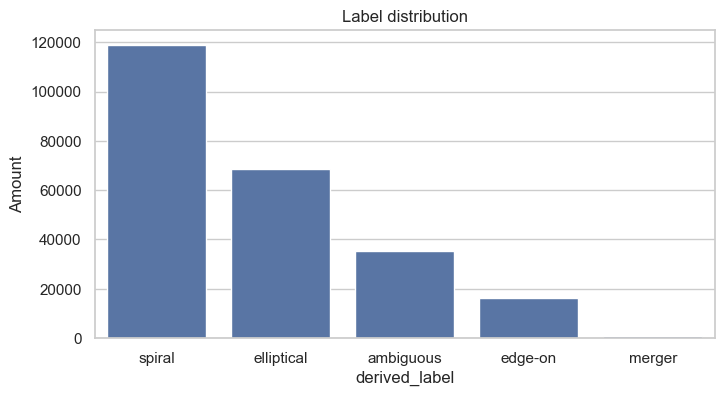


SAMPLE

derived_label
spiral        250
elliptical    250
edge-on       250
merger        250
Name: count, dtype: int64


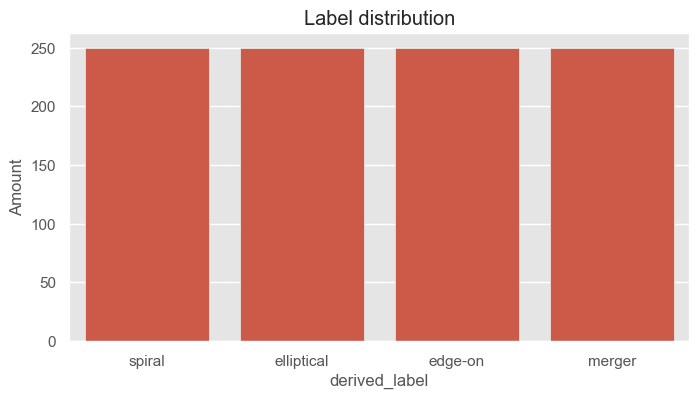

In [58]:
print("FULL\n")
print(dfm['derived_label'].value_counts())
plt.figure(figsize = (8,4))
sns.barplot(x=dfm['derived_label'].value_counts().index, y=dfm['derived_label'].value_counts().values)
plt.ylabel('Amount')
plt.title('Label distribution')
plt.style.use('ggplot')
plt.show()

print("\nSAMPLE\n")
print(df['derived_label'].value_counts())
plt.figure(figsize = (8,4))
sns.barplot(x=df['derived_label'].value_counts().index, y=df['derived_label'].value_counts().values)
plt.ylabel('Amount')
plt.title('Label distribution')
plt.show()

Indeed, almost half of entries were classified as spiral, a quarter were elliptical, and there were much less ambiguous and edge-on ones. Merger galaxies, surprisingly, had only 674 entries (~0.3%).

A couple of random images with labels:



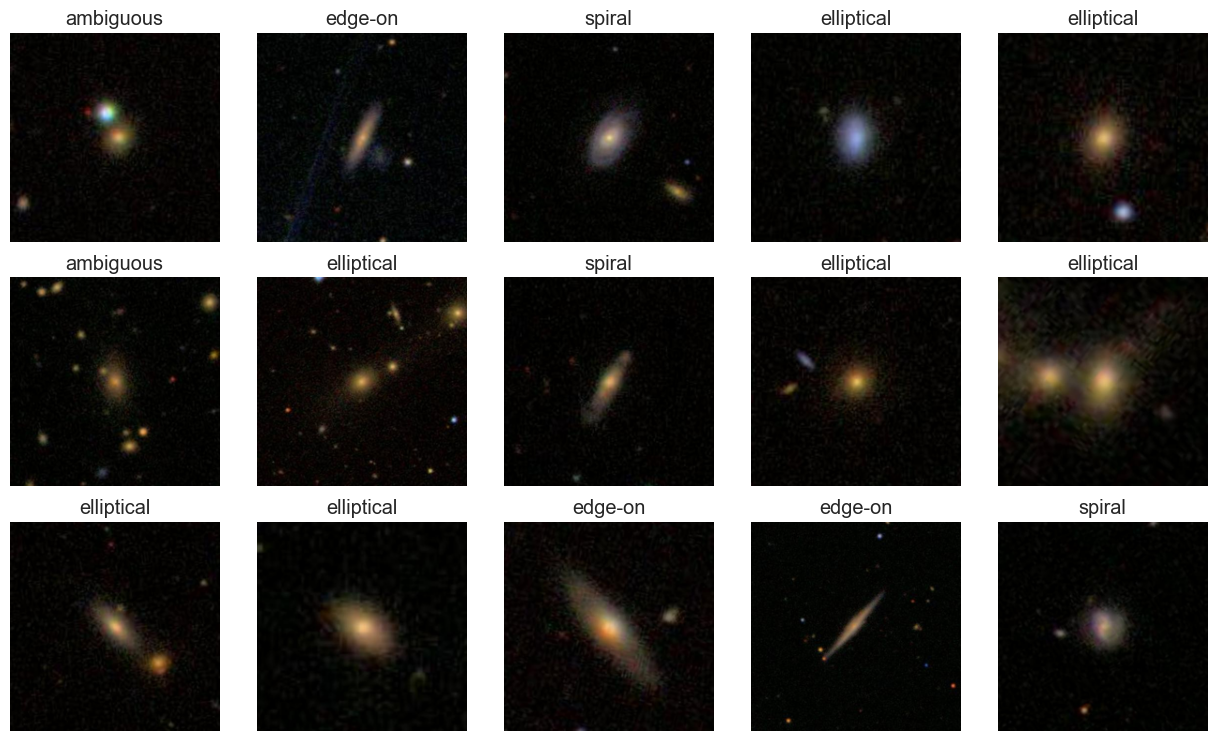

Examples of each class:



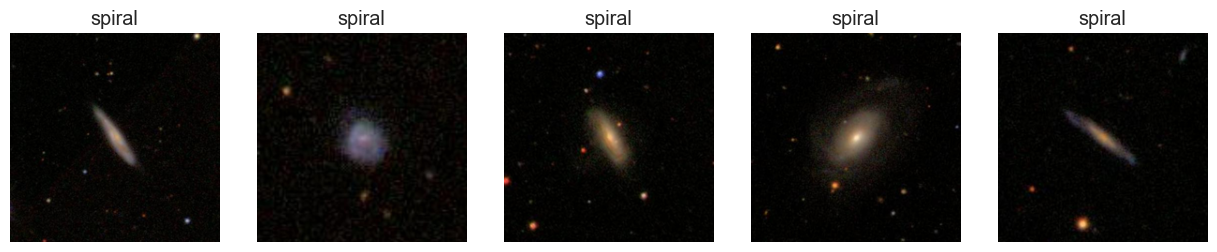

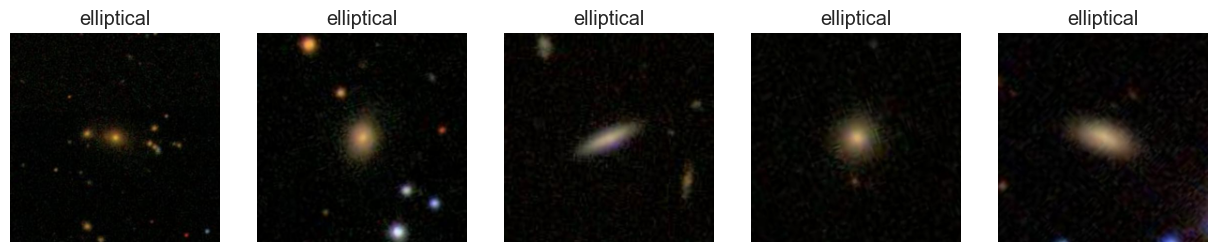

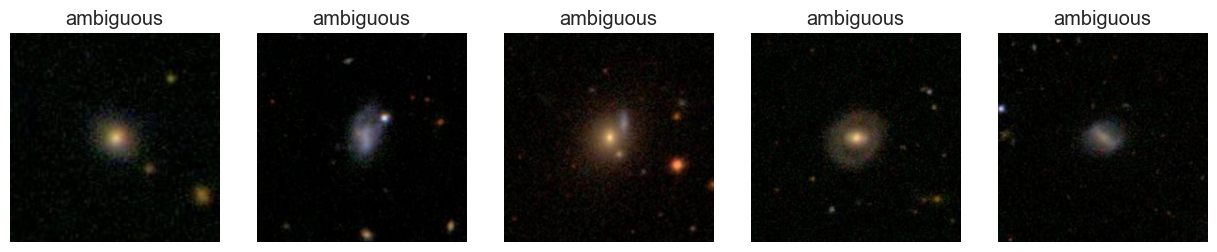

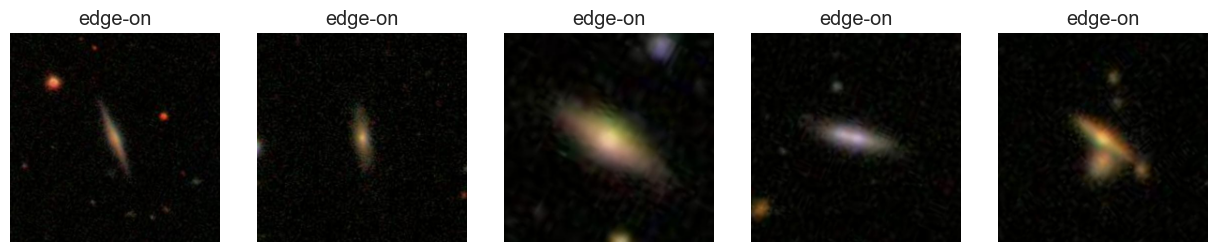

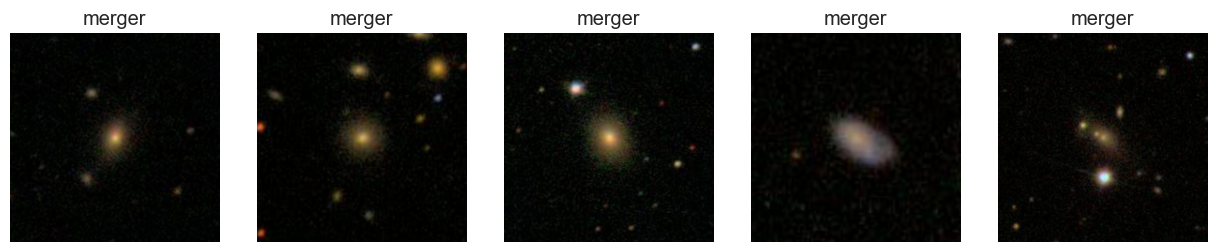

In [59]:
#[partially AI-generated function]
def show_images(rows=3, cols=5, label=None):
    chosen = dfm if label is None else dfm[dfm['derived_label']==label]
    chosen = chosen.sample(min(len(chosen), rows*cols), random_state=5629)
    fig, axs = plt.subplots(rows, cols, figsize=(cols*2.5, rows*2.5))
    axs = axs.ravel()
    for ax, (_, row) in zip(axs, chosen.iterrows()):
        img = Image.open(row['filepath_PC']).convert('RGB').resize((224,224))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(str(row['derived_label'])[:20])
    plt.tight_layout()
    plt.show()
print("A couple of random images with labels:\n")
show_images()
print("Examples of each class:\n")
show_images(rows=1, label=dfm['derived_label'].value_counts().index[0])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[1])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[2])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[3])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[4])

The galaxies in the sample are very varied and have distinct features. All the thumbnails are 224 by 224 pixels, 3 color channels. Artifacts can be rarely seen: chromatic aberration, gravitational lensing. Additionally, the objects are very rarely alone in the photos: this could negatively impact training. However, if the noise and out of place objects are evenly distributed, the models may learn to ignore it.

## **Captions**

As for the captions, captions.csv contains generated captions for every class. Most were automatically generated, and a few were written by hand by me

Basically:
* spiral - "A spiral galaxy with visible arms."
* elliptical - "An elliptical galaxy with a smooth light profile."
* edge-on - "A galaxy seen edge-on; disk oriented side-on."
* merger - "A galaxy showing disturbed or merger-like features."

In [60]:
captions_filepath = r"C:\Users\user\PycharmProjects\galaxy_morphology_ml_captioning\data\labels\captions.csv"
dfc = pd.read_csv(captions_filepath)
print("Here are some random captions:\n")
for c in dfc['caption'].dropna().sample(min(10, dfc['caption'].dropna().shape[0]), random_state=5629):
    print("-", c)
print("Here is the average caption length:")
print(sum(dfc['caption'].dropna().map(len).tolist())/len(dfc['caption'].dropna()))

Here are some random captions:

- A galaxy seen edge-on; disk oriented side-on.
- A galaxy showing disturbed or merger-like features.
- An elliptical galaxy with a smooth light profile.
- A galaxy showing disturbed or merger-like features.
- A galaxy seen edge-on; disk oriented side-on.
- An elliptical galaxy with a smooth light profile.
- A galaxy seen edge-on; disk oriented side-on.
- A galaxy seen edge-on; disk oriented side-on.
- A galaxy showing disturbed or merger-like features.
- A galaxy showing disturbed or merger-like features.
Here is the average caption length:
44.75


Let's look at the numeric features in the dataset:

FULL SET:

Total numeric columns: 88


,objid,asset_id,dr7objid,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,...,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar
count,2.396950e+05,239695.000000,2.396950e+05,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,...,239695.000000,239695.00000,239695.000000,239695.000000,2.396950e+05,239695.000000,239695.000000,239695.000000,239695.000000,239695.0
mean,5.878182e+17,141839.965669,5.878182e+17,42.569745,179.024565,0.639344,0.645559,0.397942,0.320342,0.323623,...,0.025175,0.26239,0.250457,141839.965669,5.878182e+17,0.498088,0.397942,0.138170,0.052595,0.0
std,1.827461e+14,81522.356647,1.827461e+14,5.856933,60.729097,0.284853,0.288195,0.346484,0.292011,0.295732,...,0.121978,0.36351,0.356535,81522.356647,1.827461e+14,0.455929,0.346484,0.279828,0.143878,0.0
min,5.877230e+17,3.000000,5.877230e+17,16.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,3.000000,5.877230e+17,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.877327e+17,71619.500000,5.877327e+17,39.000000,140.000000,0.455000,0.459000,0.040000,0.091000,0.091000,...,0.000000,0.00000,0.000000,71619.500000,5.877327e+17,0.000000,0.040000,0.000000,0.000000,0.0
50%,5.877393e+17,140287.000000,5.877393e+17,43.000000,156.000000,0.760000,0.768000,0.326000,0.190000,0.193000,...,0.000000,0.00000,0.000000,140287.000000,5.877393e+17,0.582820,0.326000,0.000000,0.000000,0.0
75%,5.877429e+17,212457.500000,5.877429e+17,46.000000,196.000000,0.863000,0.871000,0.776000,0.511000,0.514000,...,0.000000,0.50000,0.434294,212457.500000,5.877429e+17,0.989056,0.776000,0.091459,0.009183,0.0
max,5.888489e+17,295305.000000,5.888489e+17,79.000000,604.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,295305.000000,5.888489e+17,1.000000,1.000000,1.000000,1.000000,0.0


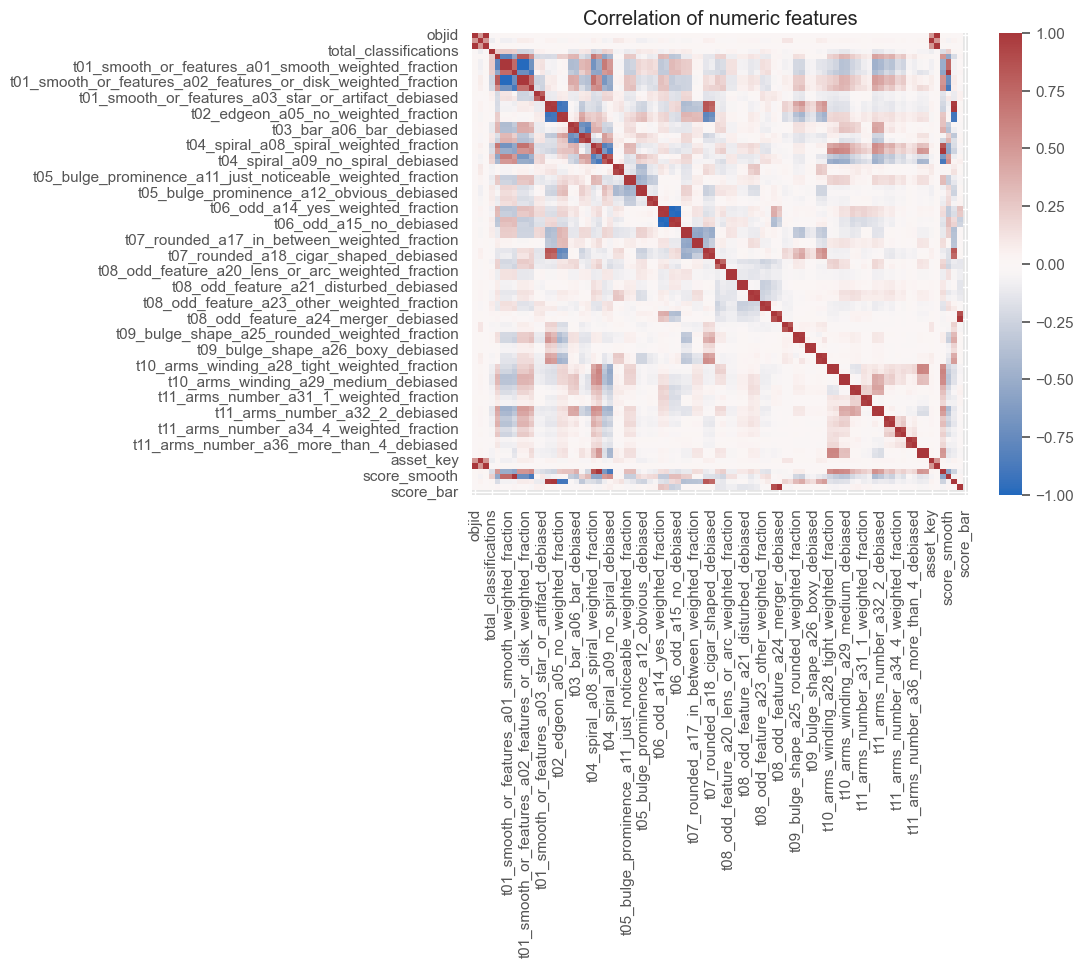


SAMPLE:

Total numeric columns: 88


,objid,asset_id,dr7objid,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,...,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,5.878114e+17,140454.676000,5.878114e+17,42.822000,168.478000,0.645814,0.652545,0.391635,0.310799,0.313714,...,0.01433,0.170842,0.165161,140454.676000,5.878114e+17,0.278923,0.391635,0.291180,0.241103,0.0
std,1.790412e+14,82977.365892,1.790412e+14,5.532352,50.373058,0.259084,0.262113,0.322136,0.266019,0.269635,...,0.09882,0.330331,0.325130,82977.365892,1.790412e+14,0.403659,0.322136,0.397370,0.354203,0.0
min,5.877230e+17,68.000000,5.877230e+17,22.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,68.000000,5.877230e+17,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.877327e+17,71215.500000,5.877327e+17,40.000000,137.750000,0.500000,0.506250,0.081000,0.098000,0.098750,...,0.00000,0.000000,0.000000,71215.500000,5.877327e+17,0.000000,0.081000,0.000000,0.000000,0.0
50%,5.877391e+17,136708.500000,5.877391e+17,43.000000,154.000000,0.732000,0.739000,0.339000,0.216000,0.214000,...,0.00000,0.000000,0.000000,136708.500000,5.877391e+17,0.000000,0.339000,0.016316,0.000000,0.0
75%,5.877426e+17,215987.750000,5.877426e+17,46.000000,182.000000,0.848000,0.857000,0.743000,0.472750,0.477000,...,0.00000,0.119750,0.112365,215987.750000,5.877426e+17,0.594429,0.743000,0.707104,0.608947,0.0
max,5.888489e+17,295148.000000,5.888489e+17,73.000000,448.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,295148.000000,5.888489e+17,1.000000,1.000000,1.000000,1.000000,0.0


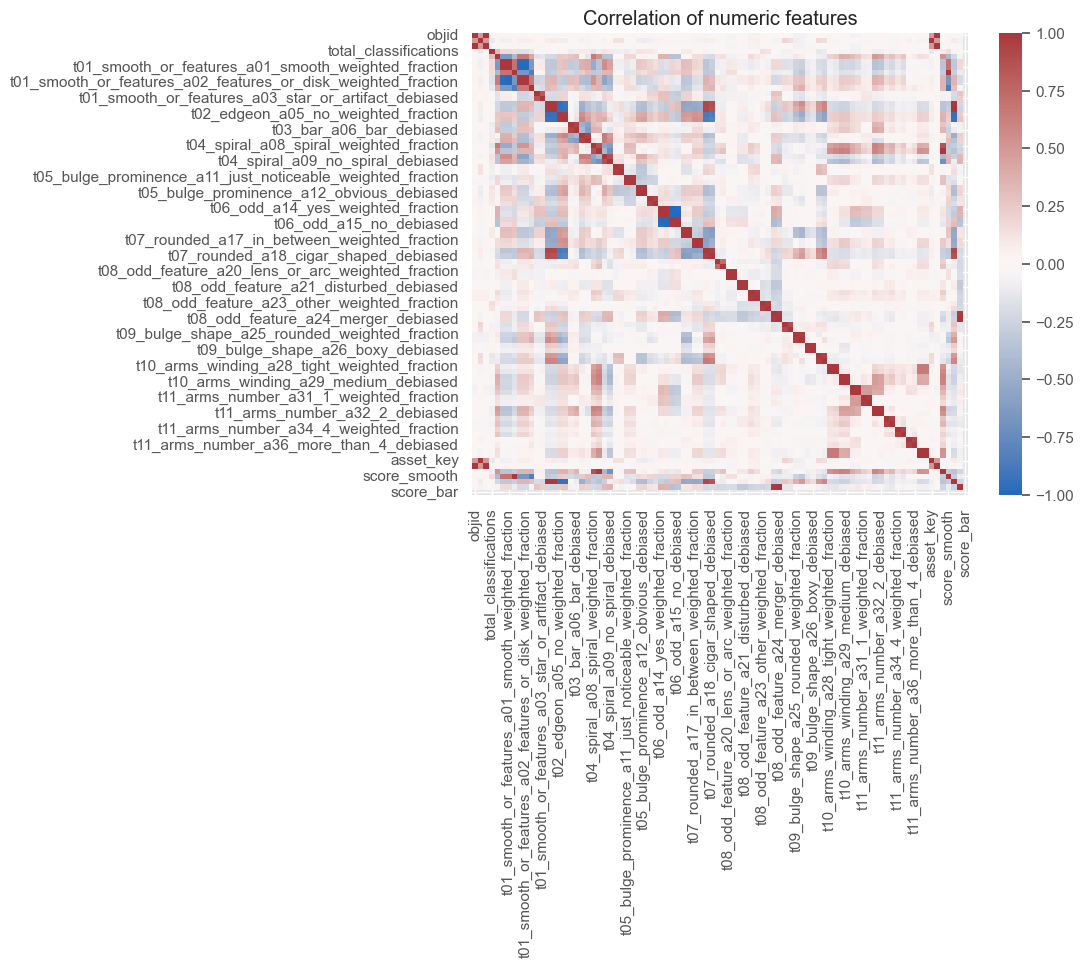

In [61]:
print("FULL SET:\n")
num_cols_listm = dfm.select_dtypes(['int64', 'float64']).columns.tolist()
print("Total numeric columns:", len(num_cols_listm))
display(dfm[num_cols_listm].describe())
plt.figure(figsize=(8,6))
sns.heatmap(dfm[num_cols_listm].corr(), fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation of numeric features')
plt.show()

print("\nSAMPLE:\n")
num_cols_list = df.select_dtypes(['int64', 'float64']).columns.tolist()
print("Total numeric columns:", len(num_cols_list))
display(df[num_cols_list].describe())
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols_list].corr(), fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation of numeric features')
plt.show()

Analyzing the heatmap, almost no features show sophisticated correlation, meaning that none of the columns of the dataset are redundant.

Additionally, the average values in both datasets are really close, meaning that the sample is a good representative of the entire thing.

Now, a check for corrupted images:

In [64]:
issues_m = []
for _, r in dfm.iterrows():
    path = None
    if pd.notna(r['filepath_PC']):
        path = r['filepath_PC']
    if path is None or not os.path.exists(path):
        issues_m.append((r.get('id',None), path))
print("Missing or non-existent paths in full dataset:", len(issues_m))
issues_m[:10]

issues = []
for _, r in df.iterrows():
    path = r['filepath_PC']
    if path is None or not os.path.exists(path):
        issues.append((r.get('id',None), path))
print("Missing or non-existent paths in sample:", len(issues))
issues[:10]

Missing or non-existent paths in full dataset: 122
Missing or non-existent paths in sample: 0


[]

No corrupted images were found (in the sample)!

The 122 missing filepaths still exist.

In the following steps (preprocessing), I will split the dataset into training (70%) and validation (20%) split, and also leave a small fraction (10%) for posterior evaluation. For the baseline model, the input will consist of images-only. Later I plan on adding column data to see the difference.

## Summary

What can be inferred from the dataset:
- Dataset size: 1000
- Label classes: spiral, elliptical, edge-on, merger, ambiguous
- No major quality issues found
- preprocessing lies ahead